# shAI Training 2022 | Level 1


## (MNIST Project part 2)

### Classification

- Before you start make sure you have latest Jupyter notebook version 
- <font color= red> If you have older version fetching the data might be different  </font>  


In [ ]:
# import sklearn.datasets
# from sklearn.datasets import fetch_openml
# mnist =fetch_openml('mnist_784')
# x, y = mnist["data"], mnist["target"]

In [ ]:
# x.shape

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#### peek at one digit

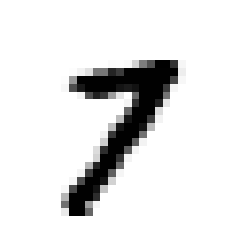

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = x_train[40000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
y_train_5 = (y_train == 5)  
y_test_5 = (y_test == 5)

## **SGD Classifier  model**

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)

the shape of x must be in 1 dimention 

In [ ]:
x_train= x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)

In [ ]:
sgd_clf.fit(x_train,y_train ) 


SGDClassifier(random_state=42)

In [ ]:
some_digit = x_train[40000]

#### Try SGDCClassifier with multiple calss

In [ ]:
# CODE HERE
sgd_clf.predict([some_digit])

array([7], dtype=uint8)

#### Call decision_function() method to return score for each instance 

In [ ]:
# CODE HERE
sgd_clf.decision_function([some_digit])

array([[-47063.43421946, -23169.89338437, -17374.57701952,
         -6512.85004001, -20455.65971043, -13995.94980096,
        -52045.87393571,   8907.01120414,  -3465.57377509,
         -4516.20401187]])

#### find highest score 

In [ ]:
# CODE HERE
sgd_clf.decision_function([some_digit]).max()

8907.011204135915

#### list the target classes

In [ ]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Find the the target class for 7

In [ ]:
# CODE HERE
# if you got stuck use GOOGLE
# CODE HERE
import numpy as np
np.argmax(sgd_clf.decision_function([some_digit]))

7

#### Force ScikitLearn to use one-versus-one

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

In [ ]:
# CODE HERE
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train,y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [ ]:
ovo_clf.predict([some_digit])

array([7], dtype=uint8)

#### find how many classifier OvO used

In [ ]:
# CODE HERE
len(ovo_clf.estimators_)

45

#### Train  RandomForestClassifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
# CODE HERE
forest_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

#### call predict_proba() to get the list of probabilities that the classifier assigned to each instance for each class

In [ ]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  ]])

In [ ]:
forest_clf.predict_proba([some_digit]).max()

0.99

In [ ]:
np.argmax(forest_clf.predict_proba([some_digit]))

7

#### Find accurcy using cross validation score ()

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# CODE HERE
cross_val_score(sgd_clf, x_train,y_train,cv=3,scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
cross_val_score(forest_clf, x_train,y_train,cv=3,scoring="accuracy")

array([0.9646 , 0.96255, 0.9666 ])

#### to get better accurcy try scaling input

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# CODE HERE
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

In [ ]:
cross_val_score(sgd_clf,x_train_scaled , y_train , cv=3, scoring = "accuracy")

array([0.8983, 0.891 , 0.9018])

In [ ]:
cross_val_score(forest_clf,x_train_scaled , y_train , cv=3, scoring = "accuracy")

array([0.96445, 0.96255, 0.96645])

## Error Analysis

#### Take a look at the confusion matrix

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [ ]:
# CODE HERE
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred, )
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

#### using Matplotlib’s matshow() function look at an image representation of the confusion matrix

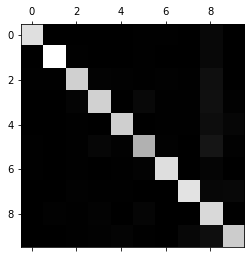

In [ ]:
# CODE HERE
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

#### Dividing each value in the confusion matrix by the number of images in the corresponding class

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

#### fill the diagonal with zeros to keep only the errors

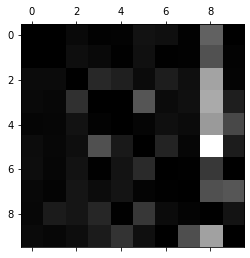

In [ ]:
# CODE HERE
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)

In [ ]:
def plot_digits(instances, images_per_row=10, **options): 
    size = 28 
    images_per_row = min(len(instances), images_per_row) 
    images = [instance.reshape(size,size) for instance in instances] 
    n_rows = (len(instances) - 1) // images_per_row + 1 
    row_images = [] 
    n_empty = n_rows * images_per_row - len(instances) 
    images.append(np.zeros((size, size * n_empty)))  
    for row in range(n_rows): 
        rimages = images[row * images_per_row : (row + 1) * images_per_row] 
        row_images.append(np.concatenate(rimages, axis=1)) 
    image = np.concatenate(row_images, axis=0) 
    plt.imshow(image, cmap = plt.cm.binary, **options) 
    plt.axis("off") 

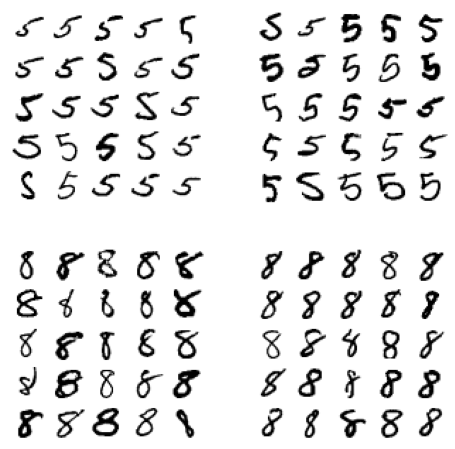

In [ ]:
cl_a, cl_b = 5, 8
X_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

## Multilabel Classification

#### creates a y_multilabel array containing two target labels for each digit image

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train%2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

#### find the prediction

In [ ]:
# CODE HERE
knn_clf.predict([some_digit])

array([[ True,  True]])

#### computes the average F1 score across all labels
***Warning: the following cell may take a very long time (possibly hours depending on your hardware)***

In [ ]:
#y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
#f1_score(y_train, y_train_knn_pred, average="macro")

## Multioutput Classification


In [ ]:
x_test = x_test.reshape(10000,784)

In [ ]:
noise = np.random.randint(0, 100, (len(x_train), 784))
X_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784))
X_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]]) 

In [ ]:
x_test=x_test.reshape(10000,28,28)

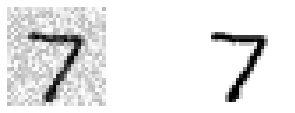

In [ ]:
plt.subplot(221);plot_digits([X_test_mod[0]])
plt.subplot(222);plot_digits([x_test[0]]) 

#### Let’s take a peek at an image from the test set

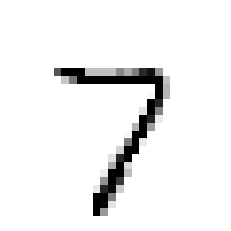

In [ ]:
# CODE HERE
plot_digits(clean_digit)

# Congrats you've finished your first classification Project🥳 !
# #shAI_Club